In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
car= pd.read_csv(r'C:\Users\yoges\Car Sale Price Prediction\Quikr_car.csv')


In [3]:
car.drop('Unnamed: 0',axis=1,inplace=True)
car.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1032 non-null   object
 1   Label       1032 non-null   object
 2   Location    1030 non-null   object
 3   Price       1032 non-null   object
 4   Kms_driven  1032 non-null   object
 5   Fuel_type   1032 non-null   object
 6   Owner       740 non-null    object
 7   Year        1032 non-null   int64 
 8   Company     1032 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.7+ KB


In [5]:
car.shape

(1032, 9)

In [6]:
car['Label'].unique()

array(['PLATINUM', 'GOLD'], dtype=object)

<Axes: >

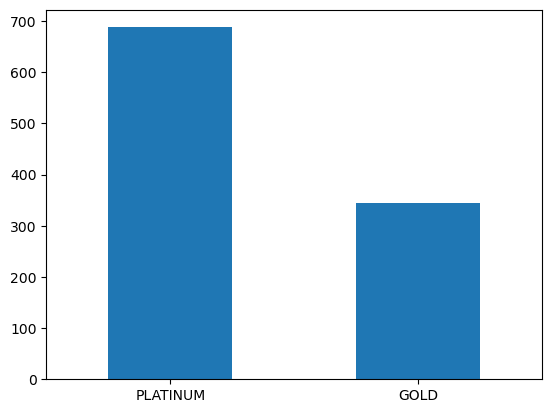

In [7]:

car['Label'].value_counts().plot(kind='bar',rot=0)

In [8]:
car.drop('Location',axis=1,inplace=True)

In [9]:
car.drop('Label',axis=1,inplace=True)

In [10]:
car['Kms_driven']=car['Kms_driven'].str.split().apply(lambda x: x[0])

In [11]:
car['Kms_driven']=car['Kms_driven'].str.replace(',','').astype(int)

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1032 non-null   object
 1   Price       1032 non-null   object
 2   Kms_driven  1032 non-null   int32 
 3   Fuel_type   1032 non-null   object
 4   Owner       740 non-null    object
 5   Year        1032 non-null   int64 
 6   Company     1032 non-null   object
dtypes: int32(1), int64(1), object(5)
memory usage: 52.5+ KB


In [13]:
car['Price']=car['Price'].str.replace(',','').apply(lambda x: x.replace('₹',''))

In [14]:
car.head()

,Name,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,380000,35056,Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,465000,44000,Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,1350000,42917,Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,1019699,16112,Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,713499,30988,Petrol,2nd Owner,2017,Honda


In [15]:
car=car.drop(car[car['Price']=='Ask For Price'].index)

In [16]:
car['Price']=car['Price'].astype(int)

In [17]:
car.drop('Owner',axis=1,inplace=True)

In [18]:
car.reset_index(drop=True,inplace=True)

In [19]:
car['Year']=car['Year'].astype('category')

In [20]:
def first_three(x):
    abc=[]
    for i,j in enumerate(x.split()):
        abc.append(j)
        if i>1:
            break
    abc=" ".join(abc)
    return(abc)

In [21]:
car['Name']=car['Name'].apply(first_three)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        1026 non-null   object  
 1   Price       1026 non-null   int32   
 2   Kms_driven  1026 non-null   int32   
 3   Fuel_type   1026 non-null   object  
 4   Year        1026 non-null   category
 5   Company     1026 non-null   object  
dtypes: category(1), int32(2), object(3)
memory usage: 33.9+ KB


In [23]:

car['Company'].unique()

array(['Ford', 'Maruti', 'Hyundai', 'Honda', 'Toyota', 'Jeep', 'Kia',
       'Tata', 'Audi', 'Renault', 'BMW', 'Nissan', 'MG', 'Mahindra',
       'Volkswagen', 'Volvo', 'Skoda', 'Jaguar', 'Mercedes', 'Ssangyong',
       'Fiat', 'Chevrolet', 'Datsun', 'Land', 'Porsche'], dtype=object)

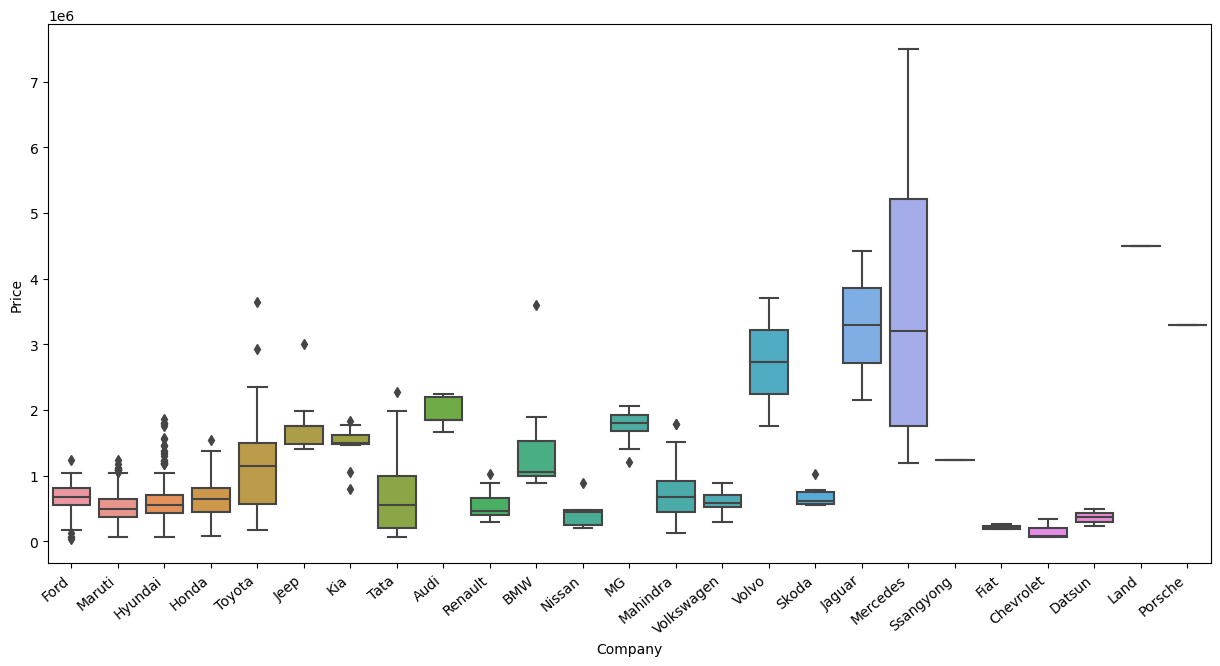

In [24]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

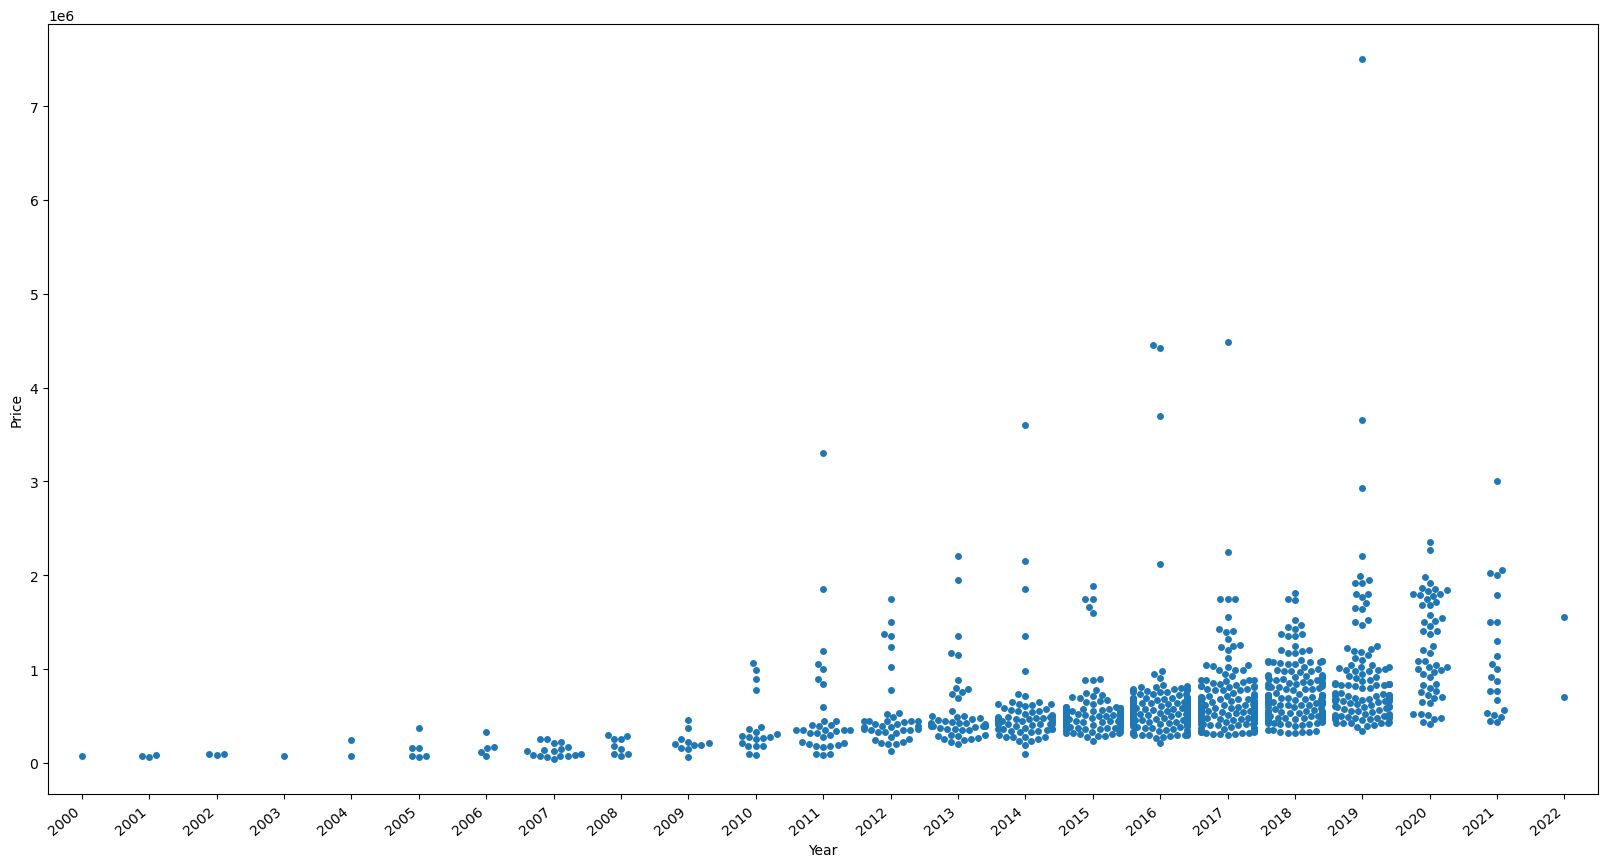

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

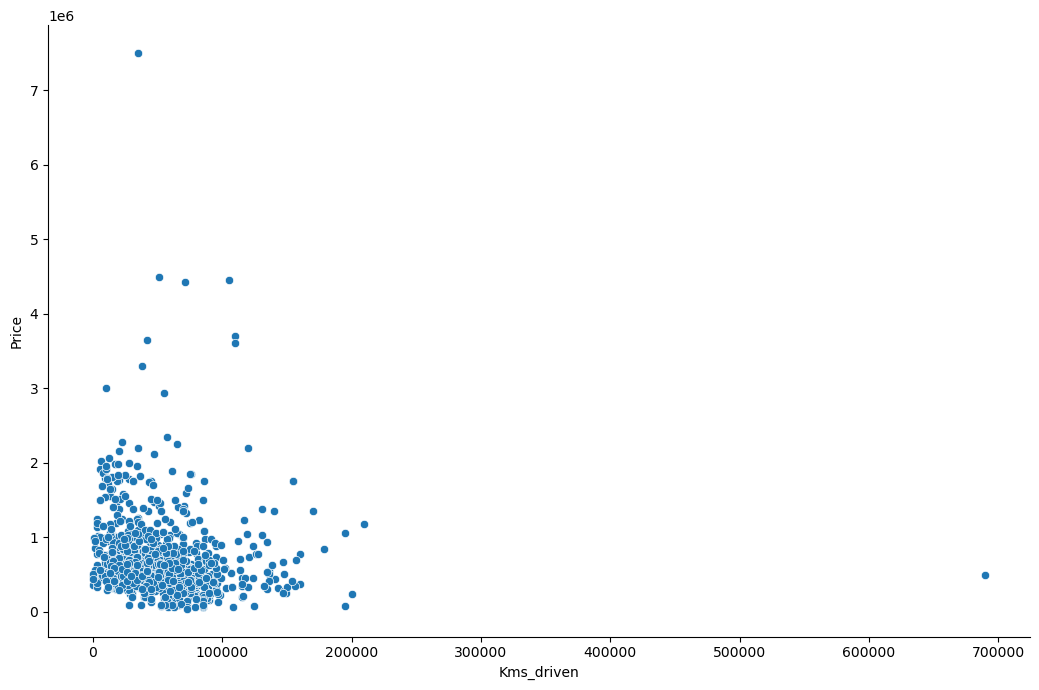

In [26]:

sns.relplot(x='Kms_driven',y='Price',data=car,height=7,aspect=1.5)

In [ ]:
car['Fuel_type'].unique()

array([' Petrol', ' Petrol ', ' Diesel ', ' Diesel', ' Electric ', ' CNG',
       ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG '], dtype=object)

In [28]:
car['Fuel_type']=car['Fuel_type'].replace(' Petrol','Petrol')

In [29]:
car['Fuel_type']=car['Fuel_type'].replace(' Petrol ','Petrol')

In [30]:
car['Fuel_type']=car['Fuel_type'].replace(' Diesel ','Diesel')

In [31]:
car['Fuel_type']=car['Fuel_type'].replace(' Diesel','Diesel')

In [32]:
car['Fuel_type']=car['Fuel_type'].replace(' CNG','CNG')

In [33]:
car['Fuel_type']=car['Fuel_type'].replace(' CNG ','CNG')

In [34]:
car.to_csv('cleaned_car')

<Axes: xlabel='Fuel_type', ylabel='Price'>

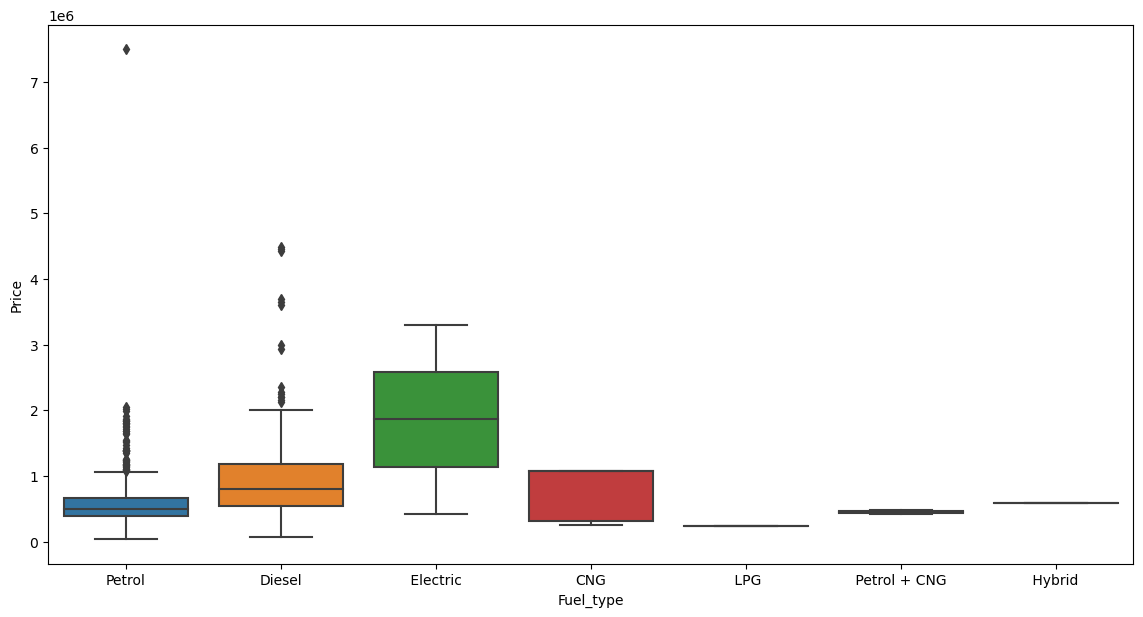

In [35]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_type',y='Price',data=car)

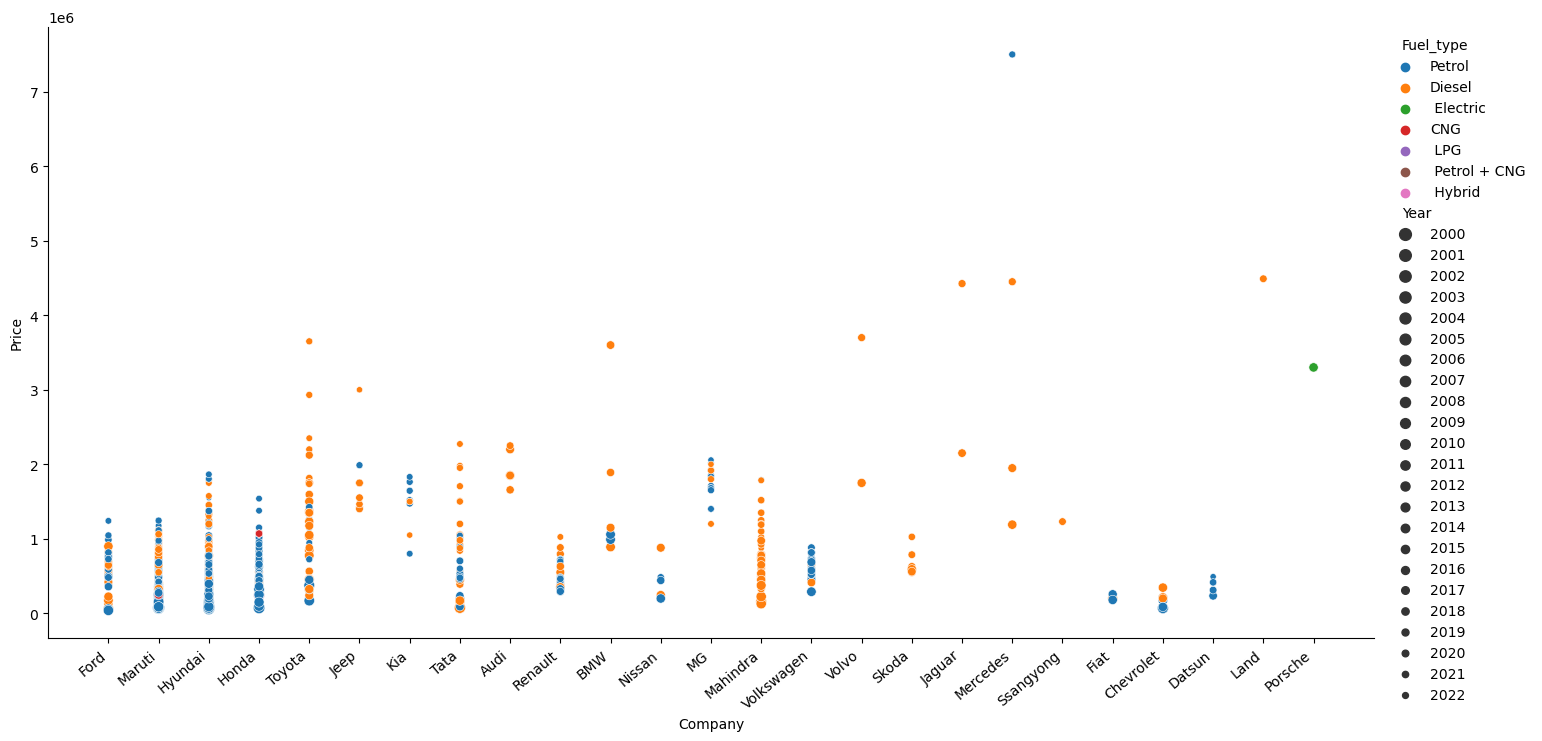

In [36]:
ax=sns.relplot(x='Company',y='Price',data=car,hue='Fuel_type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

Extractiong Training Data

In [38]:
X=car[['Name','Company','Year','Kms_driven','Fuel_type']]
y=car['Price']

In [39]:
X

,Name,Company,Year,Kms_driven,Fuel_type
0,Ford Figo Duratec,Ford,2015,35056,Petrol
1,Maruti Suzuki Wagon,Maruti,2016,44000,Petrol
2,Hyundai Creta 1.6,Hyundai,2018,42917,Petrol
3,Hyundai Venue -,Hyundai,2019,16112,Petrol
4,Honda Jazz -,Honda,2017,30988,Petrol
...,...,...,...,...,...
1021,Hyundai i10 Magna,Hyundai,2014,65000,Petrol
1022,Maruti Suzuki Alto,Maruti,2014,60000,Petrol
1023,Jeep Compass Limited,Jeep,2017,31000,Diesel
1024,Jeep Compass Limited,Jeep,2017,31000,Diesel


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Creating a column transformer to transform categorical columns

In [44]:
transformer=ColumnTransformer(transformers=[('clt1',StandardScaler(),['Kms_driven']),
                                            ('clt2',OneHotEncoder(drop='if_binary',handle_unknown='infrequent_if_exist'),['Name','Company','Fuel_type','Year'])],
                            remainder='passthrough')

Regression Models


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet


In [46]:
models = []
models.append(('lr', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('DecisionTree',DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('net', ElasticNet()))

Making a pipeline

In [47]:
result=[]
names=[]
for name, model in models:
    pipe=Pipeline([('trnf1',transformer),('trnf2',model)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    accuracy= r2_score(y_test,y_pred)
    result.append(accuracy)
    names.append(name)
    print('Regressor: {}, Accuracy: {})'.format(name, accuracy))

Regressor: lr, Accuracy: 0.6831014152464023)
Regressor: Ridge, Accuracy: 0.6534903102488561)
Regressor: Lasso, Accuracy: 0.3221727231810221)
Regressor: DecisionTree, Accuracy: 0.26726594241412727)
Regressor: SVR, Accuracy: -0.07035760004059277)
Regressor: GBR, Accuracy: 0.34995721906802746)
Regressor: net, Accuracy: 0.13345864603317525)


In [49]:
# cross validation using cross_val_score for linear regression
from sklearn.model_selection import cross_val_score

pipe=Pipeline([('trnf1',transformer),('trnf2',LinearRegression())])
cross_val_score(pipe, X_train, y_train,cv=10).mean()

0.6287363877243823

In [50]:
scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=Pipeline([('trnf1',transformer),('trnf2',lr)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [51]:
np.argmax(scores)

64

In [52]:
scores[np.argmax(scores)]

0.862838719613397

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=64)
lr=LinearRegression()
pipe=Pipeline([('trnf1',transformer),('trnf2',lr)])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.862838719613397

In [55]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array([['Maruti Suzuki Swift','Maruti',2019,5000,'Petrol']]))).round(2)

array([483960.47])

In [56]:
import pickle


In [985]:
pickle.dump(pipe,open('linear_car.pkl','wb'))

In [57]:
pipe.predict(pd.DataFrame(columns=['Name','Label','Company','Year','Kms_driven','Fuel_type'],data=np.array([['Maruti Suzuki Swift','GOLD','Maruti',2019,5000,'Petrol']]))).round(2)[0]

483960.47